# Project: 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#preprocessing">Data Preprocessing</a></li>
<li><a href="#building">Model Building</a></li>
<li><a href="#evaluation">Model Evaluation</a></li>
</ul>

<a id='intro'></a>
## Introduction 

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.

### Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

## Setup

In [1]:
# import pakcages and libraries needed for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

### Assessing & Building Intuition

In [2]:
# Loading data and printing out a few lines. 
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

* Column ["male"] needs to be more general.
* Some Columns needs to be renamed

__Attributes__

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

__Demographic__

|__Column__|__Description__|
|:---------|:--------------|
|• Male: |male or female (Nominal)|
|• Age: |Age of the patient (Continuous)|

__Behavioral__

|__Column__|__Description__|
|:---------|:--------------|
|• Current Smoker: |whether or not the patient is a current smoker (Nominal)|
|• Cigs Per Day: |the number of cigarettes that the person smoked on average in one day.|

__Medical (history)__

|__Column__|__Description__|
|:---------|:--------------|
|• BP Meds: |whether or not the patient was on blood pressure medication (Nominal)|
|• Prevalent Stroke: |whether or not the patient had previously had a stroke (Nominal)|
|• Prevalent Hyp: |whether or not the patient was hypertensive (Nominal)|
|• Diabetes: |whether or not the patient had diabetes (Nominal)|

__Medical (current)__

|__Column__|__Description__|
|:---------|:--------------|
|• Tot Chol: |total cholesterol level (Continuous)|
|• Sys BP: |systolic blood pressure (Continuous)|
|• Dia BP: |diastolic blood pressure (Continuous)|
|• BMI: |Body Mass Index (Continuous)|
|• Heart Rate: |heart rate (Continuous)|
|• Glucose: |glucose level (Continuous)|

__Predict variable (desired target)__

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [4]:
# inspecting numbers of the dataset rows and columns
df.shape

(4238, 16)

* The dataset has 4238 rows and 16 columns including the target column

In [5]:
# inspect data types for each Column
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

* There are 2 columns ["education", "BPMeds"] have incorrect data types, since they are nominal data with float64 data type.

In [6]:
# look for instances of missing data and possibly errant values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


* We have 4238 rows in the datasets, therefore the columns ["education", "cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"] have missing values.

In [7]:
# Check number of unique values in each column
df.nunique() 

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

* Columns ["male", "currentSmoker", "BMeds", "prevalentStrike", "prevalentHyp", "diabetes"] are nominal attributes each of them has only 2 values, while column ["education"] has 4 values and also is a nominal value.

In [8]:
df.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

* We have a problem here, the dataset isn't balanced!

In [9]:
# Check the characteristics of the dataset
df.iloc[:,np.r_[1,4,9:15]].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4209.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,11.920094,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [10]:
# Printing the last few lines to see how the data
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


<a id='preprocessin'></a>
## Data Preprocessing

### Data Cleaning (Fix problems in the dataset!)

__Duplicated Data__

In [11]:
# Check duplicated data
df.duplicated().sum()

0

* That's great! The dataset has no duplicated rows!

__Renaming Data Columns__

In [12]:
# rename the column male to gender to be more general
df.rename(columns={"male": "gender"}, inplace= True)

In [13]:
# lowercase the columns names
df.rename(columns = lambda X: X.lower(), inplace= True)
df.columns

Index(['gender', 'age', 'education', 'currentsmoker', 'cigsperday', 'bpmeds',
       'prevalentstroke', 'prevalenthyp', 'diabetes', 'totchol', 'sysbp',
       'diabp', 'bmi', 'heartrate', 'glucose', 'tenyearchd'],
      dtype='object')

In [14]:
# separate the columns names
df.rename(columns={"currentsmoker": "current_smoker", "cigsperday": "cigs_per_day", 
                   "bpmeds": "bp_meds","prevalentstroke": "prevalent_stroke", 
                   "prevalenthyp": "prevalent_hyp","totchol": "tot_chol", 
                   "sysbp": "sys_bp", "diabp": "dia_bp", "heartrate": "heart_rate"}, inplace= True)

In [15]:
df.columns

Index(['gender', 'age', 'education', 'current_smoker', 'cigs_per_day',
       'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'tot_chol',
       'sys_bp', 'dia_bp', 'bmi', 'heart_rate', 'glucose', 'tenyearchd'],
      dtype='object')

* Now datasets columns are clean!

__Missing Data__

In [16]:
# print number of NaN Values
df.isnull().sum()

gender                0
age                   0
education           105
current_smoker        0
cigs_per_day         29
bp_meds              53
prevalent_stroke      0
prevalent_hyp         0
diabetes              0
tot_chol             50
sys_bp                0
dia_bp                0
bmi                  19
heart_rate            1
glucose             388
tenyearchd            0
dtype: int64

In [17]:
# Taking care of missing data
# import required library
from sklearn.impute import SimpleImputer

# Setting strategy for numrical data
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [18]:
# Choose only missing data columns of numerical data
index = np.r_[4,9,12:15]

# Apply my strategy on selected columns
imputer = imputer.fit(df.iloc[:,index])

# Transform my strategy on the data
df.iloc[:,index] = imputer.transform(df.iloc[:,index])

In [19]:
# Setting strategy for nominal data
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [20]:
# Choose only missing data columns of nominal data
index = np.r_[2, 5]

In [21]:
# Apply my strategy on selected columns
imputer = imputer.fit(df.iloc[:,index])

# Transform my strategy on the data
df.iloc[:,index] = imputer.transform(df.iloc[:,index])

In [22]:
# Check for any NaN Values
df.isnull().sum().any()

False

* The dataset now has no missing data!

__Incorrect Data Types__

In [23]:
# Convert columns "education", "bp_meds" to np.int64
df = df.astype({"education": np.int64, "bp_meds": np.int64})
df.dtypes

gender                int64
age                   int64
education             int64
current_smoker        int64
cigs_per_day        float64
bp_meds               int64
prevalent_stroke      int64
prevalent_hyp         int64
diabetes              int64
tot_chol            float64
sys_bp              float64
dia_bp              float64
bmi                 float64
heart_rate          float64
glucose             float64
tenyearchd            int64
dtype: object

* Columns "education", "bp_meds" have correct data types now!

__Removing Outliers__

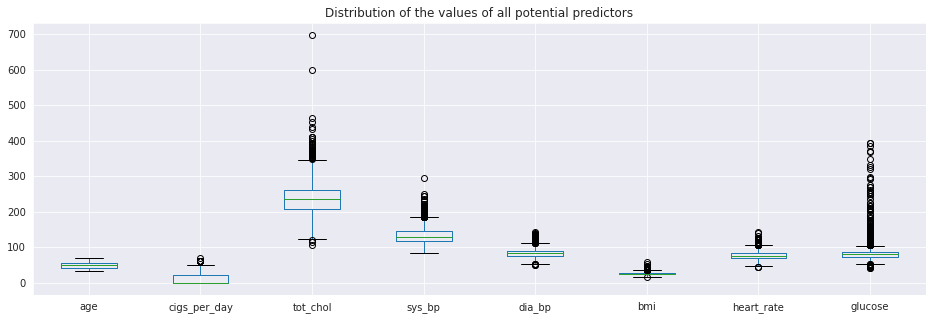

In [24]:
Index = np.r_[1,4,9:15]
plt.figure(figsize=(16,5))
df.iloc[:,Index].boxplot()
plt.title("Distribution of the values ​​of all potential predictors")
plt.show()

In [25]:
outliers = ['age','cigs_per_day', 'tot_chol', 'sys_bp','dia_bp', 'bmi', 'heart_rate', 'glucose']
for column in outliers:
  Q1,Q3 = np.percentile(df[column],[25,75])
  IQR = Q3 - Q1
  lower_fence = Q1 - (1.5*IQR)
  upper_fence = Q3 + (1.5*IQR)  
  df[column] = df[column].apply(lambda x: upper_fence if x>upper_fence
                                              else lower_fence if x<lower_fence else x)

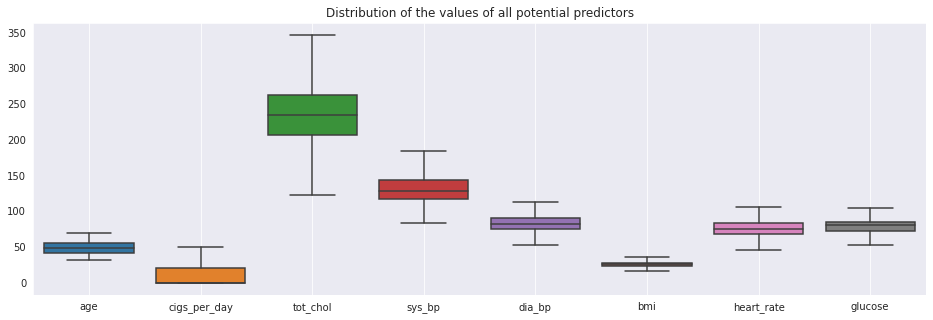

In [26]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df.iloc[:,Index])
plt.title("Distribution of the values ​​of all potential predictors")
plt.grid()
plt.show()

### Saving Data for Future work


In [27]:
df.to_csv('framingham_clean.csv', index=False)

In [28]:
df_clean = pd.read_csv('framingham_clean.csv')
df_clean.head()

,gender,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,tenyearchd
0,1,39,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Feature Scaling 

In [29]:
# Scaling for making close variables values from each other
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# choose index for only scaling numerical data
index = np.r_[1,4,9:15]
df.iloc[:, index] = scaler.fit_transform(df.iloc[:, index]) # apply fit() on X_train and transform fit on X_train 

In [30]:
print(df.iloc[0,:])

gender              1.000000
age                -1.234951
education           4.000000
current_smoker      0.000000
cigs_per_day       -0.763194
bp_meds             0.000000
prevalent_stroke    0.000000
prevalent_hyp       0.000000
diabetes            0.000000
tot_chol           -0.974747
sys_bp             -1.255196
dia_bp             -1.118089
bmi                 0.330699
heart_rate          0.365617
glucose            -0.245553
tenyearchd          0.000000
Name: 0, dtype: float64


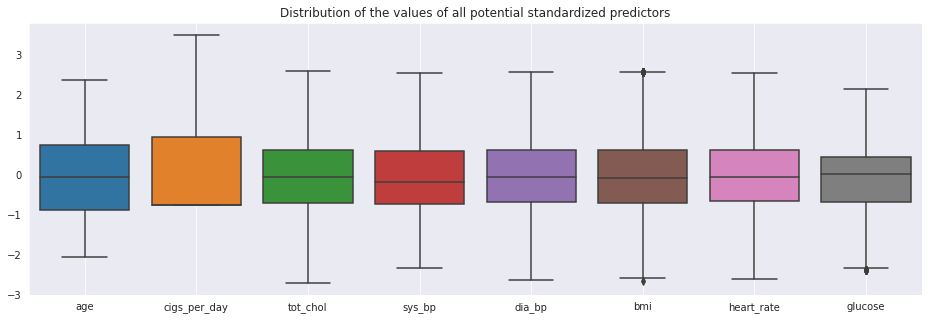

In [31]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df.iloc[:,Index])
plt.title("Distribution of the values ​​of all potential standardized predictors")
plt.grid()
plt.show()

* Now the dataset is ready and can be saved for future work.

### Splitting the dataset

In [32]:
# independant and dependant variables
X = df.iloc[:,:-1].values # independent variables
y = df.iloc[:,-1].values # dependent variable

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [34]:
# Check whether the dataset is equally splitted or no
from collections import Counter
Counter(y_train)

Counter({0: 2855, 1: 535})

<a id='building'></a>
## Model Building


In [35]:
from tensorflow import keras
model = keras.Sequential()

# # First Hidden Layer
# model.add(keras.layers.Dense(32, input_shape= (15,), activation = 'relu'))

model.add(keras.layers.Dense(1, input_shape= (15,), activation = 'sigmoid'))

In [36]:
from tensorflow.keras import optimizers

RMS = optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
    )

adam = optimizers.Adam(
    learning_rate=0.002, 
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-07, 
    decay=0.0,
    name="adam"
    )

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
sgd = optimizers.SGD(learning_rate=lr_schedule, name ='sgd')

In [37]:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [38]:
results = model.fit(
    x = X_train,
    y = y_train,
    epochs = 100,
    batch_size =128,
    validation_data = (X_test, y_test)
)

Epoch 1/100
27/27 [==============================] - 2s 18ms/step - loss: 0.9235 - binary_accuracy: 0.4053 - val_loss: 0.7794 - val_binary_accuracy: 0.4906
Epoch 2/100
27/27 [==============================] - 0s 7ms/step - loss: 0.7227 - binary_accuracy: 0.5687 - val_loss: 0.6346 - val_binary_accuracy: 0.6462
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6189 - binary_accuracy: 0.6705 - val_loss: 0.5576 - val_binary_accuracy: 0.7134
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5626 - binary_accuracy: 0.7239 - val_loss: 0.5132 - val_binary_accuracy: 0.7724
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 0.5297 - binary_accuracy: 0.7537 - val_loss: 0.4850 - val_binary_accuracy: 0.7913
Epoch 6/100
27/27 [==============================] - 0s 8ms/step - loss: 0.5085 - binary_accuracy: 0.7758 - val_loss: 0.4664 - val_binary_accuracy: 0.8078
Epoch 7/100
27/27 [==============================] - 0s 10ms/step - l

<a id='evaluation'></a>
## Model Evaluation

In [39]:
eval = model.evaluate(x = X_test, y = y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.3690 - binary_accuracy: 0.8667


Text(0, 0.5, 'Losses')

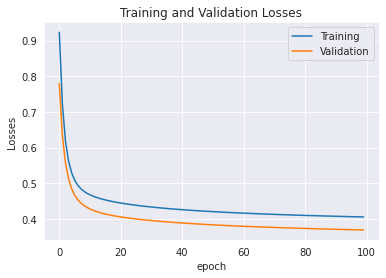

In [40]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')


Text(0, 0.5, 'accuarcy')

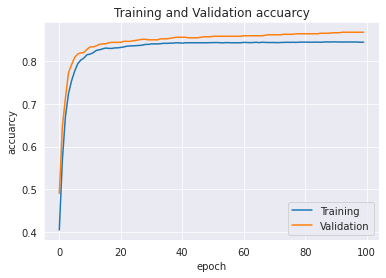

In [41]:
plt.plot(results.history['binary_accuracy'])
plt.plot(results.history['val_binary_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuarcy')
plt.xlabel('epoch')
plt.ylabel('accuarcy')


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.save('final_project_chd_10_years_risk_NN.h5')

In [44]:
((model.predict(X_train[0:25,:]) >= 0.5).astype(int)).reshape(1,-1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

In [46]:
model.predict(X_train[0:1,:])

array([[0.11876091]], dtype=float32)